<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [349]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [350]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [351]:
data = pd.read_csv('./train.csv')

In [352]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на случайные строчки

In [353]:
data.sample(n=5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4705,29,58.55,1718.95,Female,1,No,No,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
3126,18,74.15,1345.75,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
5169,22,100.75,2095,Male,0,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3215,35,75.20,2576.2,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
3010,31,20.45,638.55,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


Найдем пропуски

In [354]:
pd.DataFrame(data.isna().sum(), columns=['NA'])

,NA
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [355]:
for col in data.columns:
    print(f'{col}:{data[col].unique()}')

ClientPeriod:[55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36
  0]
MonthlySpending:[ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ]
TotalSpent:['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6']
Sex:['Male' 'Female']
IsSeniorCitizen:[0 1]
HasPartner:['Yes' 'No']
HasChild:['Yes' 'No']
HasPhoneService:['Yes' 'No']
HasMultiplePhoneNumbers:['No' 'Yes' 'No phone service']
HasInternetService:['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService:['No internet service' 'No' 'Yes']
HasOnlineBackup:['No internet service' 'No' 'Yes']
HasDeviceProtection:['No internet service' 'No' 'Yes']
HasTechSupportAccess:['No internet service' 'Yes' 'No']
HasOnlineTV:['No internet service' 'No' 'Yes']
HasMovieSubscription:['No internet service' 'No' 'Yes']
HasContractPhone:['One year' 'Two year' 'Month-to-month']
IsBillingPaperless:['No' 

Признак TotalSpent содержит неверный тип данных и пропуски

In [358]:
data.replace(r'^\s*$', np.nan, regex=True).isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [317]:
data['TotalSpent'].str.findall(r'(^\D)').sum()

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [318]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')

Таблица с пропусками

In [319]:
pd.DataFrame(data.isna().sum(), columns=['NA'])

,NA
ClientPeriod,0
MonthlySpending,0
TotalSpent,9
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Признак ClientPeriod содержит неверные значения

In [320]:
data.loc[data.ClientPeriod == 0, :]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Гистограммы распределения

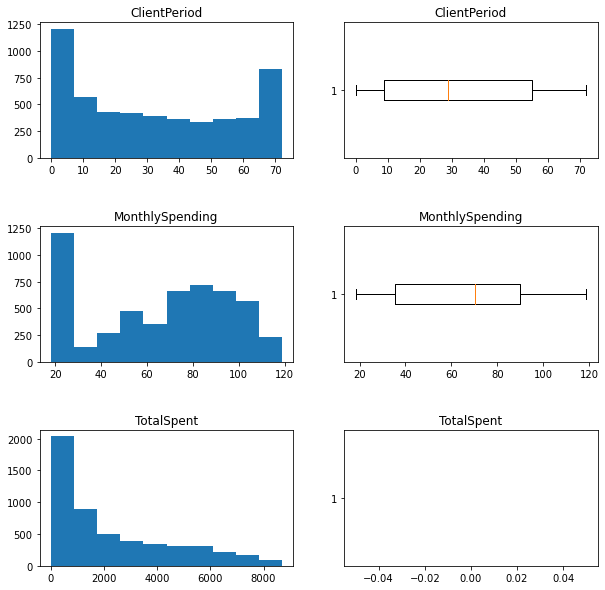

In [321]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for i, num_col in enumerate(num_cols):
    axes[i][0].hist(x=data[num_col])
    axes[i][0].set_title(num_col)
    
    axes[i][1].boxplot(data[num_col], vert=False)
    axes[i][1].set_title(num_col)

plt.subplots_adjust(hspace=0.5)
plt.show()

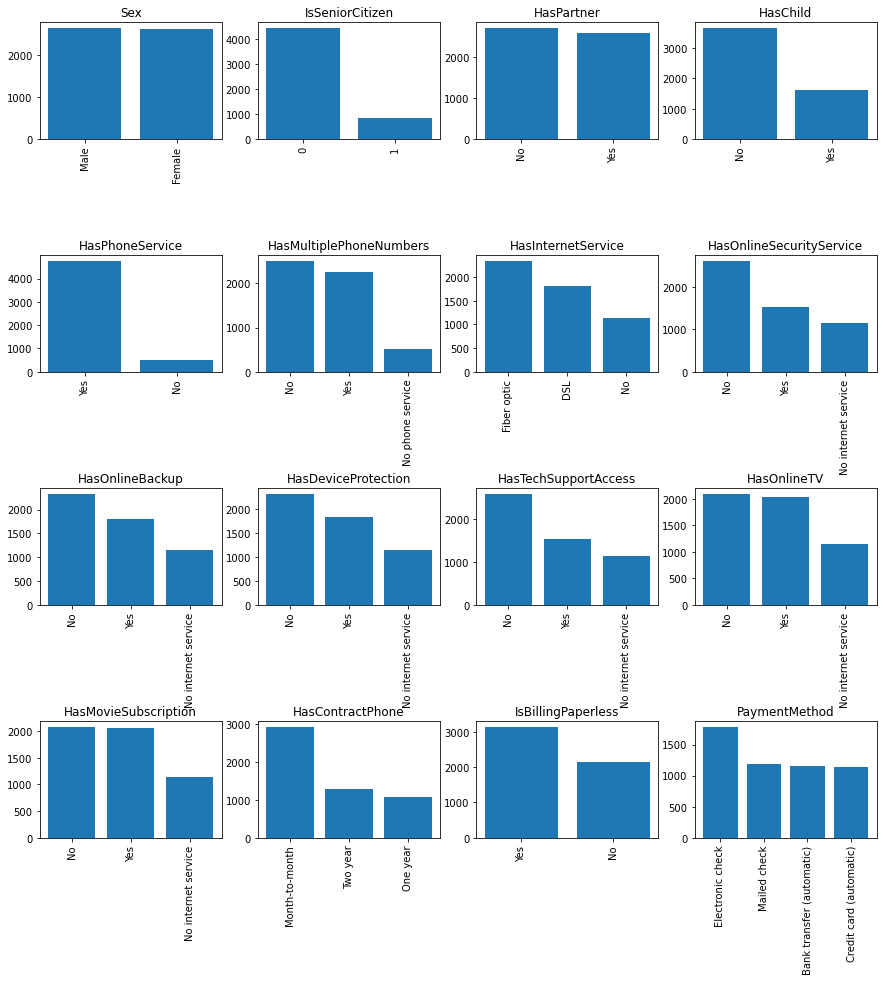

In [322]:
columns = np.asarray(cat_cols).reshape(4, 4)
fig, ax = plt.subplots(columns.shape[0], columns.shape[1], figsize=(15, 15))
fig.subplots_adjust(hspace=1)

for i in range(4):
    for j in range(4):
        shapes_type_count = pd.value_counts(data[columns[i, j]].values, sort=True)
        cats, freqs = shapes_type_count.index, shapes_type_count.values
        x = np.arange(shapes_type_count.shape[0])
        ax[i, j].set_title(data[columns[i, j]].name)
        ax[i, j].bar(x, freqs)

        ax[i, j].set_xticks(x)
        ax[i, j].set_xticklabels(cats, rotation='vertical')

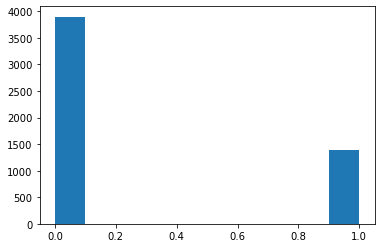

In [323]:
plt.hist(data['Churn'])
plt.show()

In [324]:
data.Churn.value_counts(normalize=True)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

Наблюдается небольшой дисбаланс классов

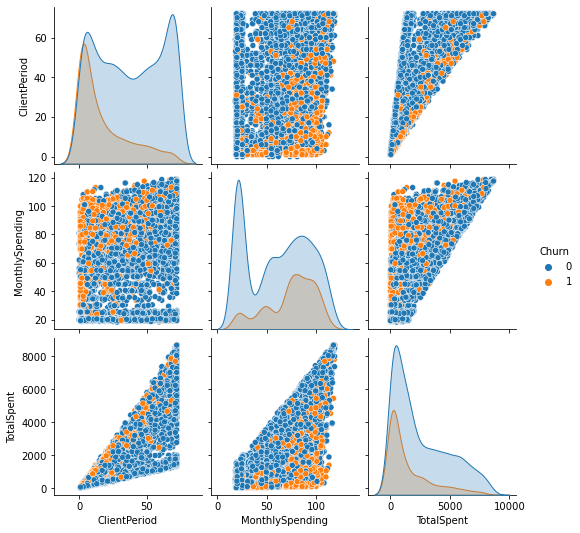

In [325]:
import seaborn as sns
sns.pairplot(data, vars=['ClientPeriod', 'MonthlySpending', 'TotalSpent'], hue='Churn');

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Заменим нулевые значения поля ClientPeriod

In [326]:
data.loc[data.ClientPeriod == 0, 'ClientPeriod'] = np.NaN

Предобработка столбцов

In [327]:
def data_encode(df):
    df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
    df['HasPartner'] = df['HasPartner'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['HasChild'] = df['HasChild'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['HasPhoneService'] = df['HasPhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['IsBillingPaperless'] = df['IsBillingPaperless'].apply(lambda x: 1 if x == 'Yes' else 0)

    df['HasMultiplePhoneNumbers'] = df['HasMultiplePhoneNumbers'].map({'No phone service': 0, 'No': 0, 'Yes': 1})
    df['HasInternetService'] = df['HasInternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
    df['HasOnlineSecurityService'] = df['HasOnlineSecurityService'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    df['HasOnlineBackup'] = df['HasOnlineBackup'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    df['HasDeviceProtection'] = df['HasDeviceProtection'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    df['HasTechSupportAccess'] = df['HasTechSupportAccess'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    df['HasOnlineTV'] = df['HasOnlineTV'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    df['HasMovieSubscription'] = df['HasMovieSubscription'].map({'No internet service': 0, 'No': 0, 'Yes': 1})

In [328]:
data_encode(data)

Восстановим пропуски с помощью машинного обучения

In [329]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer,  make_column_selector
from sklearn.pipeline import make_pipeline


X = data.dropna().drop(['TotalSpent', 'ClientPeriod', 'Churn'], axis=1)
y = data.dropna().TotalSpent
X_test = data[data.TotalSpent.isna()].drop(['TotalSpent', 'ClientPeriod', 'Churn'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=0)

tform = make_column_transformer((OneHotEncoder(), ['HasContractPhone', 'PaymentMethod']),
                               (StandardScaler(), ['MonthlySpending']))

estimator = RandomForestRegressor(n_estimators=600, max_depth=6)
regression = make_pipeline(tform, BaggingRegressor(base_estimator=estimator, n_estimators=10, random_state=0))

regression.fit(X_train, y_train)
regression.score(X_train, y_train), regression.score(X_valid, y_valid)

(0.7832792727522355, 0.7821773818400423)

Обучим на тренировочных и валидационных данных

In [330]:
regression.fit(X, y)
regression.score(X, y)

0.7837171243555299

Заполним пропуски

In [331]:
data.loc[data.TotalSpent.isna(), 'TotalSpent'] = regression.predict(X_test)
data.loc[data.ClientPeriod.isna(), 'ClientPeriod'] = data.loc[data.ClientPeriod.isna(), 'TotalSpent'] / data.loc[data.ClientPeriod.isna(), 'MonthlySpending']

Проверим дубликаты

In [332]:
data.duplicated().sum()

14

Уберем полные дубликаты

In [333]:
data.drop_duplicates(inplace=True)

Уберем дубликаты исключив один из столбцов

In [334]:
for col in data.columns:
    index = data[data.drop(col, axis=1).duplicated()].index
    data.drop(index, inplace=True)

data.reset_index(drop=True, inplace=True)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [335]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [336]:
from imblearn.under_sampling import RandomUnderSampler

X = data.drop(['Churn'], axis=1)
y = data.Churn

X.TotalSpent = np.log(X.TotalSpent)

X_train, X_valid, y_train, y_valid = \
            train_test_split(X, y, test_size=0.3, random_state=0)

for col in cat_cols:
    le = LabelEncoder().fit(X_train[col])
    X_train.loc[:, col] = le.transform(X_train[col])
    X_valid.loc[:, col] = le.transform(X_valid[col])
    
X_train, y_train = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

# num_cols = make_column_selector(dtype_include=np.number)(X_train)
# cat_cols = make_column_selector(dtype_exclude=np.number)(X_train)

tform = make_column_transformer((StandardScaler(), num_cols), 
                                (OneHotEncoder(), cat_cols))

pipe = make_pipeline(tform, LogisticRegression(class_weight={1:2.1, 0:0.9}))

params = {'logisticregression__C': (100, 10, 1, 0.1, 0.01, 0.001)}
pipe_cv = GridSearchCV(pipe, param_grid=params, scoring='roc_auc', refit=True)
pipe_cv.fit(X_train, y_train);

/run/media/same/Storage/miniconda3/envs/sandbox/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [337]:
roc_auc_score(y_train, pipe_cv.predict_proba(X_train)[:, 1]), roc_auc_score(y_valid, pipe_cv.predict_proba(X_valid)[:, 1])

(0.8595699213401701, 0.8337927322018069)

In [338]:
pipe_cv.best_params_

{'logisticregression__C': 1}

    Наилучшая точность по метрике ROC-AUC: 0.83
    Оптимальное значение коэффициента регуляризации: 1

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

CatBoost со стандартными параметрами

In [37]:
from catboost import CatBoostClassifier

X = data.drop(['Churn'], axis=1)
y = data.Churn

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

cbc = CatBoostClassifier()
cbc.fit(X_train, y_train, cat_features=cat_cols, eval_set=(X_valid, y_valid), verbose=False)

roc_auc_score(y_train, cbc.predict_proba(X_train)[:,1]), roc_auc_score(y_valid, cbc.predict_proba(X_valid)[:,1])

(0.8748470765312857, 0.8541129032258065)

CatBoost с выбранными параметрами

In [38]:
cbc = CatBoostClassifier(custom_metric='AUC', eval_metric='AUC', one_hot_max_size=3)
cbc.fit(X_train, y_train, cat_features=cat_cols, eval_set=(X_valid, y_valid), verbose=False)

roc_auc_score(y_train, cbc.predict_proba(X_train)[:,1]), roc_auc_score(y_valid, cbc.predict_proba(X_valid)[:,1])

(0.8768512805148453, 0.8566342504743834)

Бэггинг над градиентным бустингом

In [342]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
X = data.drop(['Churn'], axis=1)
y = data.Churn

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

tform = make_column_transformer((OneHotEncoder(drop='if_binary'), cat_cols),
                               (StandardScaler(), num_cols))

estimator = GradientBoostingClassifier(n_estimators=200, max_depth=5, max_features='sqrt', n_iter_no_change=3)
gbb = make_pipeline(tform, BaggingClassifier(base_estimator=estimator, n_estimators=35, random_state=0))
gbb.fit(X_train, y_train)

roc_auc_score(y_train, gbb.predict_proba(X_train)[:,1]), roc_auc_score(y_valid, gbb.predict_proba(X_valid)[:,1])

(0.8887489938854392, 0.8551351992409868)

Бэггинг над случайным лесом

In [344]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
X = data.drop(['Churn'], axis=1)
y = data.Churn

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

tform = make_column_transformer((OneHotEncoder(drop='if_binary'), cat_cols),
                               (StandardScaler(), num_cols))

estimator = RandomForestClassifier(n_estimators=600, max_depth=8)
rfr = make_pipeline(tform, BaggingClassifier(base_estimator=estimator, n_estimators=16, random_state=0))
rfr.fit(X_train, y_train)

roc_auc_score(y_train, rfr.predict_proba(X_train)[:,1]), roc_auc_score(y_valid, rfr.predict_proba(X_valid)[:,1])

(0.9105137634094116, 0.8528225806451614)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

    Наилучшая точность по метрике ROC-AUC: 0.857
    Оптимальные параметры:
        custom_metric='AUC'
        eval_metric='AUC'
        one_hot_max_size=3

В качестве модели для kaggle выберем бэггинг над случайным лесом

In [345]:
rfr.fit(X, y)
roc_auc_score(y, rfr.predict_proba(X)[:,1])

0.9051490113002407

# Предсказания

In [346]:
best_model = rfr

In [347]:
X_test = pd.read_csv('./test.csv')

X_test.TotalSpent = pd.to_numeric(X_test.TotalSpent, errors='coerce')
X_test.loc[X_test.ClientPeriod == 0, 'ClientPeriod'] = np.NaN
data_encode(X_test)

In [348]:
X_test.loc[X_test.TotalSpent.isna(), 'TotalSpent'] = regression.predict(X_test[X_test.TotalSpent.isna()].drop(['TotalSpent', 'ClientPeriod'], axis=1))
X_test.loc[X_test.ClientPeriod.isna(), 'ClientPeriod'] = X_test.loc[X_test.ClientPeriod.isna(), 'TotalSpent'] / X_test.loc[X_test.ClientPeriod.isna(), 'MonthlySpending']

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

**Результаты kaggle: Тарас_Михайлюк 0.85484**